In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
           'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
           'hours_per_week', 'native_country', 'income']

df_train = pd.read_csv('adult.data', header=None, names=columns)
df_train.columns = columns

### Analysis

In [4]:
missing_values_per_column = df_train.isnull().sum()
print(missing_values_per_column)
print(df_train.dtypes)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


### Education

[]

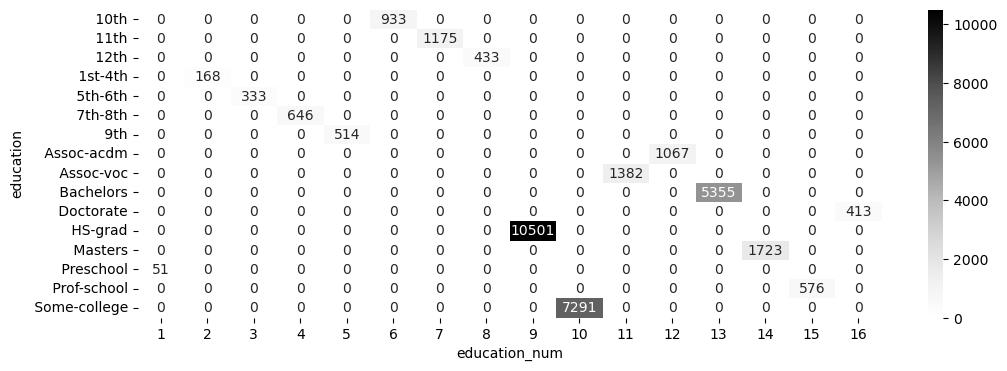

In [5]:
plt.figure(figsize=(12, 4))
crosstab = pd.crosstab(df_train['education'], df_train['education_num'])
sns.heatmap(crosstab, annot=True, cmap='Greys', fmt='d')
plt.plot()

### Duplicate

### Marital Status

[]

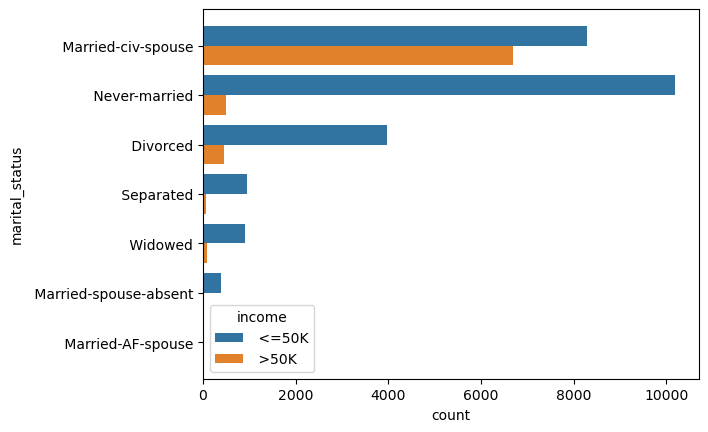

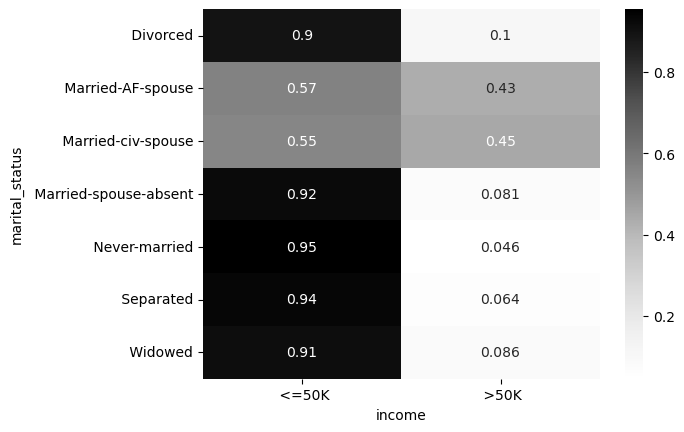

In [6]:
plt.figure()
sns.countplot(y=df_train['marital_status'], hue=df_train['income'], order=df_train['marital_status'].value_counts().index)
plt.plot()

plt.figure()
crosstab = pd.crosstab(df_train['marital_status'], df_train['income'], normalize='index')
sns.heatmap(crosstab, annot=True, cmap='Greys')
plt.plot()

### Relationship

[]

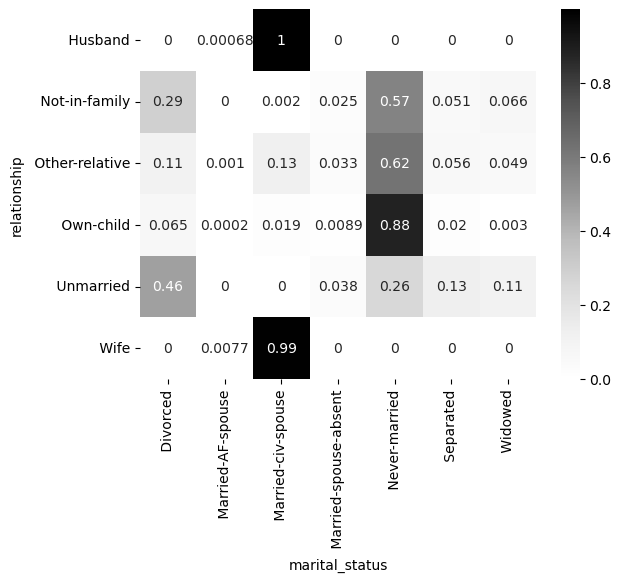

In [7]:
plt.figure()
crosstab = pd.crosstab(df_train['relationship'], df_train['marital_status'], normalize='index')
sns.heatmap(crosstab, annot=True, cmap='Greys')
plt.plot()

### Race

[]

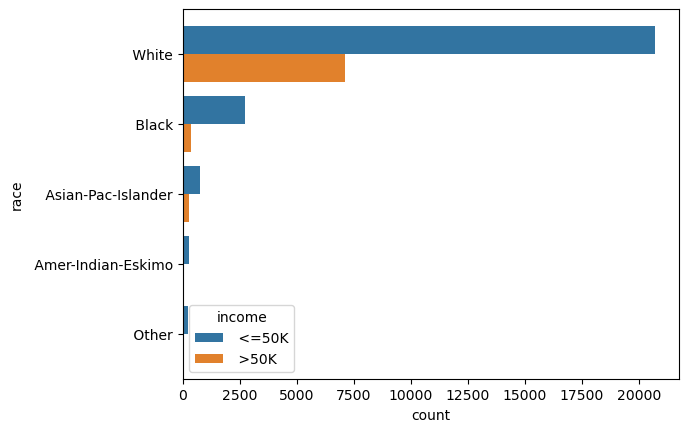

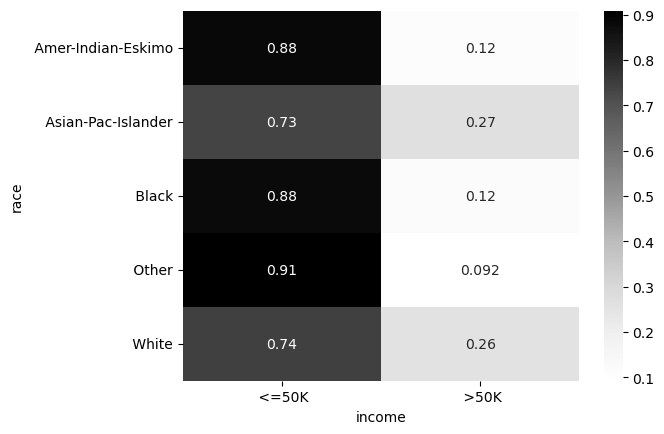

In [8]:
plt.figure()
sns.countplot(y=df_train['race'], hue=df_train['income'], order=df_train['race'].value_counts().index)
plt.plot()

plt.figure()
crosstab = pd.crosstab(df_train['race'], df_train['income'], normalize='index')
sns.heatmap(crosstab, annot=True, cmap='Greys')
plt.plot()

### WorkClass

<Figure size 640x480 with 0 Axes>

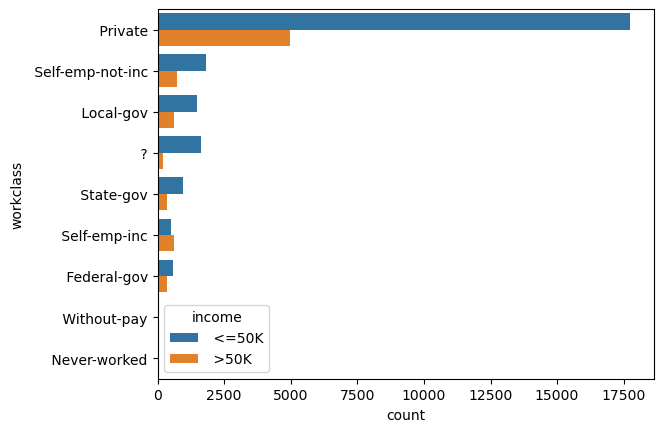

<Figure size 640x480 with 0 Axes>

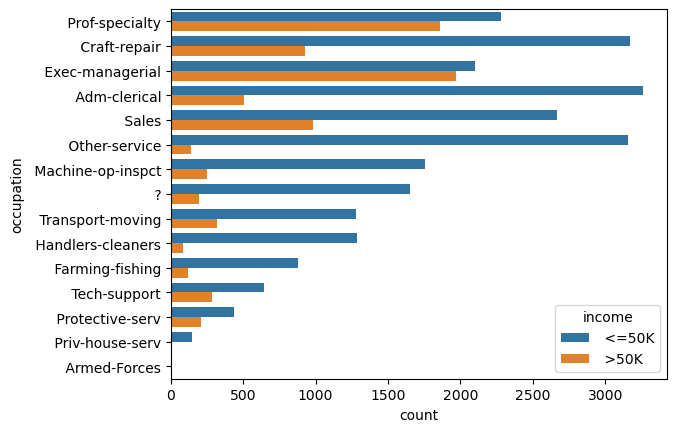

<Figure size 640x480 with 0 Axes>

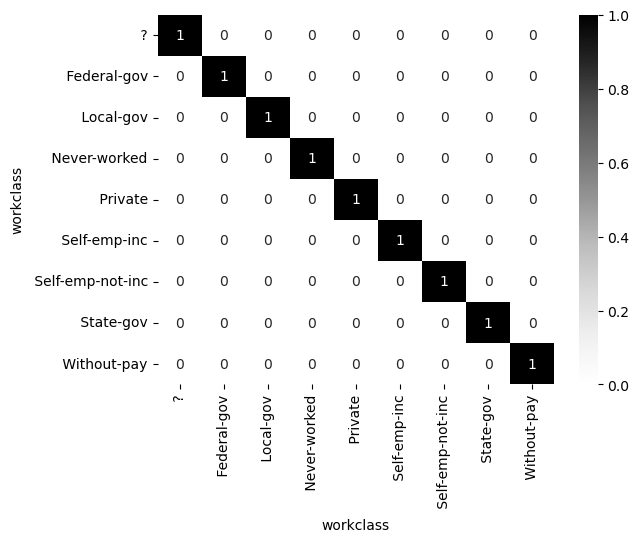

<Figure size 640x480 with 0 Axes>

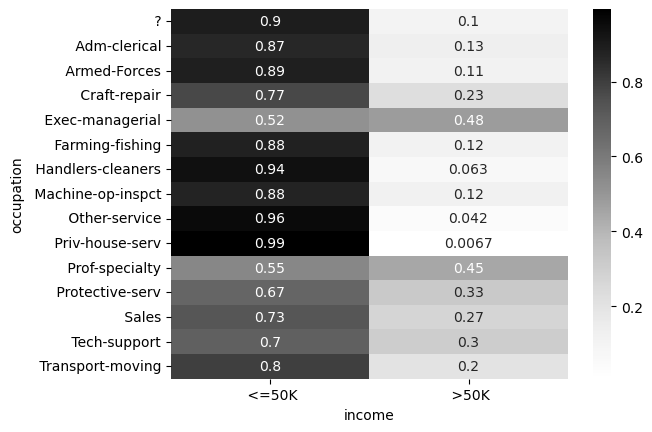

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure()
sns.countplot(y=df_train['workclass'], hue=df_train['income'], order=df_train['workclass'].value_counts().index)
plt.figure()

plt.figure()
sns.countplot(y=df_train['occupation'], hue=df_train['income'], order=df_train['occupation'].value_counts().index)
plt.figure()

plt.figure()
crosstab = pd.crosstab(df_train['workclass'], df_train['workclass'], normalize='index')
sns.heatmap(crosstab, annot=True, cmap='Greys')
plt.figure()

plt.figure()
crosstab = pd.crosstab(df_train['occupation'], df_train['income'], normalize='index')
sns.heatmap(crosstab, annot=True, cmap='Greys')
plt.figure()

### Native-country

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


[]

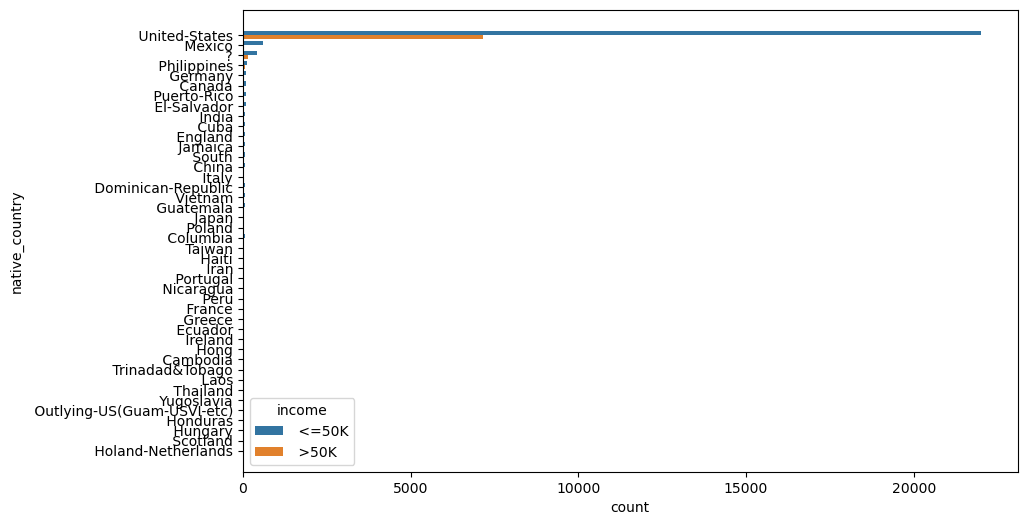

In [10]:
print(df_train['native_country'].unique())

plt.figure(figsize=(10, 6))
sns.countplot(y=df_train['native_country'], hue=df_train['income'], order=df_train['native_country'].value_counts().index)
plt.plot()

### Income

([<matplotlib.patches.Wedge at 0x1e5ae7c2300>,
 [Text(-0.7999477838977984, 0.7550387692277803, ' <=50K'),
  Text(0.7999477838977981, -0.7550387692277808, ' >50K')],
 [Text(-0.43633515485334456, 0.4118393286696983, '75.9%'),
  Text(0.43633515485334434, -0.4118393286696986, '24.1%')])

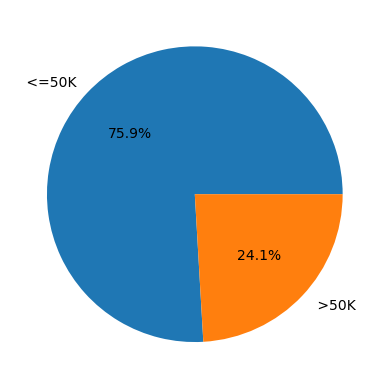

In [11]:
plt.pie(df_train.groupby('income').size(), labels=df_train.groupby('income').size().index, autopct='%1.1f%%')

### Function

In [12]:
def remove_duplicate(df):
    df.drop_duplicates(inplace=True)

def encode_marital(df_train, df_test):
    # df['marital_status'].loc[~df['marital_status'].isin([' Married-civ-spouse', ' Married-AF-spouse'])] = 'non-family'
    # df['marital_status'].loc[df['marital_status'].isin([' Married-civ-spouse', ' Married-AF-spouse']) ] = 'family'
    df_train['marital_status'] = df_train['marital_status'].apply(lambda x: 1 if x == ' Married-civ-spouse' or x == ' Married-AF-spouse' else 0)
    df_test['marital_status'] = df_test['marital_status'].apply(lambda x: 1 if x == ' Married-civ-spouse' or x == ' Married-AF-spouse' else 0)


def encode_race(df_train, df_test):
    # df['race'].loc[~df['race'].isin([' White', ' Asian-Pac-Islander'])] = 'other'
    # df['race'].loc[df['race'].isin([' White', ' Asian-Pac-Islander']) ] = 'white-asian'
    df_train['race'] = df_train['race'].apply(lambda x: 1 if x == ' White' or x == ' Asian-Pac-Islandere' else 0).astype(int)
    df_test['race'] = df_test['race'].apply(lambda x: 1 if x == ' White' or x == ' Asian-Pac-Islandere' else 0).astype(int)

def encode_sex(df_train, df_test):
    df_train['sex'] = df_train['sex'].map({' Female' : 1, ' Male' : 0}).astype(int)
    df_test['sex'] = df_test['sex'].map({' Female' : 1, ' Male' : 0}).astype(int)

def encode_workclass(df_train, df_test):
    workclass_enc = (df_train.groupby('workclass').size()) / len(df_train)

    df_train['workclass'] = df_train['workclass'].apply(lambda x : workclass_enc[x]).astype(float)
    df_test['workclass'] = df_test['workclass'].apply(lambda x : workclass_enc[x]).astype(float)

def encode_occupation(df_train, df_test):
    occupation_enc = (df_train.groupby('occupation').size()) / len(df_train)

    df_train['occupation'] = df_train['occupation'].apply(lambda x : occupation_enc[x]).astype(float)
    df_test['occupation'] = df_test['occupation'].apply(lambda x : occupation_enc[x]).astype(float)

def encode_native_country(df_train, df_test):
    country_grouping = {
        ' United-States': 'USA',
        ' Canada': 'Developed',
        ' England': 'Developed',
        ' France': 'Developed',
        ' Germany': 'Developed',
        ' Italy': 'Developed',
        ' Japan': 'Developed',
        ' Taiwan': 'Developed',
        ' Hong': 'Developed',

        ' India': 'Emerging',
        ' Iran': 'Emerging',
        ' Philippines': 'Emerging',
        ' South': 'Emerging',
        ' China': 'Emerging',
        ' Greece': 'Emerging',
        ' Hungary': 'Emerging',
        ' Ireland': 'Emerging',
        ' Poland': 'Emerging',

        ' Columbia': 'Underdeveloped',
        ' Cuba': 'Underdeveloped',
        ' Dominican-Republic': 'Underdeveloped',
        ' Ecuador': 'Underdeveloped',
        ' El-Salvador': 'Underdeveloped',
        ' Guatemala': 'Underdeveloped',
        ' Haiti': 'Underdeveloped',
        ' Honduras': 'Underdeveloped',
        ' Mexico': 'Underdeveloped',
        ' Nicaragua': 'Underdeveloped',
        ' Vietnam': 'Underdeveloped',
        ' Peru': 'Underdeveloped',
        ' Jamaica': 'Underdeveloped',
        ' Trinadad&Tobago': 'Underdeveloped',
        ' Laos': 'Underdeveloped',
        ' Thailand': 'Underdeveloped',
        ' Portugal': 'Underdeveloped',
        ' Puerto-Rico': 'Underdeveloped',
        ' Scotland': 'Underdeveloped',
        ' Cambodia': 'Underdeveloped',
        ' Yugoslavia': 'Underdeveloped',

        ' ?': 'Developed',
        ' Outlying-US(Guam-USVI-etc)': 'Developed',
        ' Holand-Netherlands': 'Developed'
    }

    df_train['native_country'] = df_train['native_country'].map(country_grouping)
    df_test['native_country'] = df_test['native_country'].map(country_grouping)

    development_mapping = {
        'Underdeveloped': 0,
        'Emerging': 2,
        'Developed': 3,
        'USA': 1 
    }

    df_train['native_country'] = df_train['native_country'].map(development_mapping).astype(int)
    df_test['native_country'] = df_test['native_country'].map(development_mapping).astype(int)

def encode_income(df_train, df_test):
    df_train['income'] = df_train['income'].map({' <=50K' : 0, ' >50K' : 1}).astype(int)
    df_test['income'] = df_test['income'].map({' <=50K.' : 0, ' >50K.' : 1}).astype(int)

def preprocessing(df_train, df_test):
    remove_duplicate(df_train)
    encode_marital(df_train, df_test)
    encode_race(df_train, df_test)
    encode_sex(df_train, df_test)
    encode_occupation(df_train, df_test)
    encode_workclass(df_train, df_test)
    encode_native_country(df_train, df_test)
    encode_income(df_train, df_test)

### Data Processing

In [13]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
           'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
           'hours_per_week', 'native_country', 'income']

df_train = pd.read_csv('adult.data', header=None, names=columns)
df_test = pd.read_csv('adult.test', header=None, names=columns, skiprows=1)

preprocessing(df_train, df_test)

In [14]:
print(df_test.dtypes)
print(df_test.head())

age                 int64
workclass         float64
fnlwgt              int64
education          object
education_num       int64
marital_status      int64
occupation        float64
relationship       object
race                int32
sex                 int32
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country      int32
income              int32
dtype: object
   age  workclass  fnlwgt      education  education_num  marital_status  \
0   25   0.696837  226802           11th              7               0   
1   38   0.696837   89814        HS-grad              9               1   
2   28   0.064327  336951     Assoc-acdm             12               1   
3   44   0.696837  160323   Some-college             10               1   
4   18   0.056428  103497   Some-college             10               0   

   occupation relationship  race  sex  capital_gain  capital_loss  \
0    0.061468    Own-child     0    0             0             0   
1    0.

<Axes: >

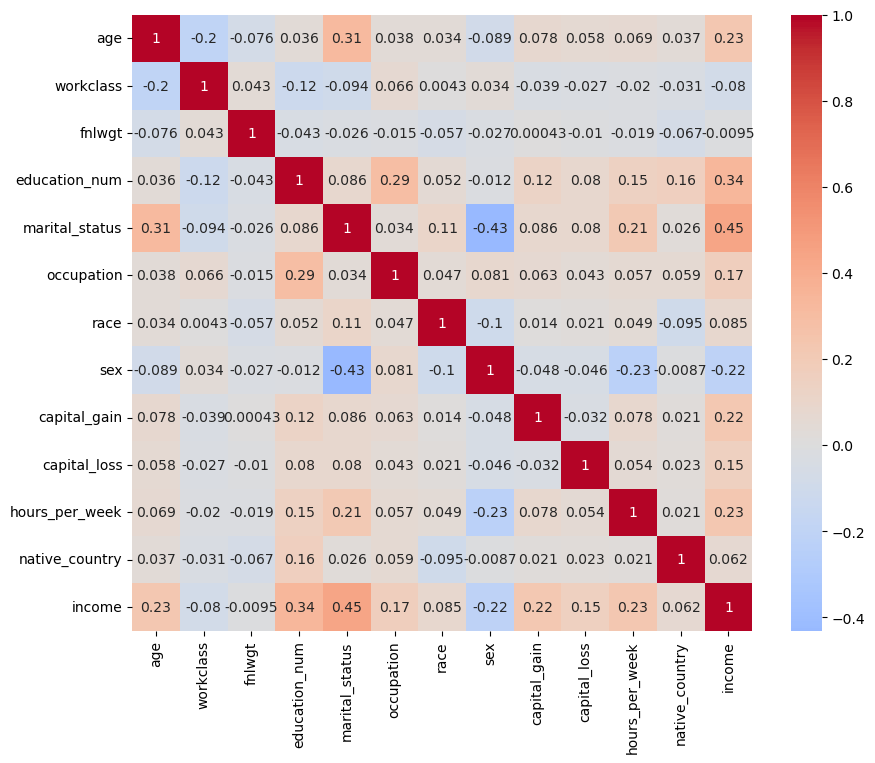

In [15]:
numeric_df = df_train.select_dtypes(include=['float64', 'int64', 'int32'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot = True, cmap='coolwarm', center=0)

## Training

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


select_features = ['age', 'education_num', 'marital_status', 'occupation', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week']

y = df_train['income']
X = df_train[select_features]

y_test = df_test['income']
X_test = df_test[select_features]

### Oversampling

In [17]:
from imblearn.combine import SMOTETomek

ros = SMOTETomek(random_state=42)
SMOTE_X, SMOTE_y = ros.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(SMOTE_X, SMOTE_y, test_size=0.2, random_state=42)

### Decision Tree

In [18]:
from sklearn.model_selection import GridSearchCV

model1 = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
}

grid_search1 = GridSearchCV(estimator=model1, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search1.fit(X_train, y_train)

print("Best Parameters:", grid_search1.best_params_)
print("Best Score:", grid_search1.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.8675705530993231


In [19]:
best_model1 = grid_search1.best_estimator_

y_pred = best_model1.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"f1: {f1:.2f}")
print("confusion matrix:\n", conf_matrix)
print("classification report:\n", class_report)

# best_model = model.fit(X_train, y_train)
best_model1 = grid_search1.best_estimator_

y_pred = best_model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"f1: {f1:.2f}")
print("confusion matrix:\n", conf_matrix)
print("classification report:\n", class_report)

accuracy: 0.88
precision: 0.87
recall: 0.89
f1: 0.88
confusion matrix:
 [[4198  628]
 [ 522 4276]]
classification report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4826
           1       0.87      0.89      0.88      4798

    accuracy                           0.88      9624
   macro avg       0.88      0.88      0.88      9624
weighted avg       0.88      0.88      0.88      9624

accuracy: 0.83
precision: 0.61
recall: 0.73
f1: 0.67
confusion matrix:
 [[10670  1765]
 [ 1047  2799]]
classification report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88     12435
           1       0.61      0.73      0.67      3846

    accuracy                           0.83     16281
   macro avg       0.76      0.79      0.77     16281
weighted avg       0.84      0.83      0.83     16281



### Random Forest

In [20]:
from sklearn.model_selection import GridSearchCV

model2 = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],

    # # 'criterion': ['gini', 'entropy']
    # 'bootstrap': [True, False]
}

grid_search2 = GridSearchCV(estimator=model2, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search2.fit(X_train, y_train)

print("Best Parameters:", grid_search2.best_params_)
print("Best Score:", grid_search2.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best Score: 0.886351841949452


In [21]:
best_model2 = grid_search2.best_estimator_

y_pred = best_model2.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"f1: {f1:.2f}")
print("confusion matrix:\n", conf_matrix)
print("classification report:\n", class_report)

# best_model = model.fit(X_train, y_train)
best_model2 = grid_search2.best_estimator_

y_pred = best_model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"f1: {f1:.2f}")
print("confusion matrix:\n", conf_matrix)
print("classification report:\n", class_report)

accuracy: 0.89
precision: 0.88
recall: 0.90
f1: 0.89
confusion matrix:
 [[4234  592]
 [ 481 4317]]
classification report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4826
           1       0.88      0.90      0.89      4798

    accuracy                           0.89      9624
   macro avg       0.89      0.89      0.89      9624
weighted avg       0.89      0.89      0.89      9624

accuracy: 0.84
precision: 0.63
recall: 0.72
f1: 0.67
confusion matrix:
 [[10844  1591]
 [ 1082  2764]]
classification report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89     12435
           1       0.63      0.72      0.67      3846

    accuracy                           0.84     16281
   macro avg       0.77      0.80      0.78     16281
weighted avg       0.84      0.84      0.84     16281



### Training Time

In [22]:
best_index1 = grid_search1.best_index_
results = grid_search1.cv_results_

best_fit_time = results['mean_fit_time'][best_index1]
print("Decision Tree Training Time (in seconds):", best_fit_time)


Decision Tree Training Time (in seconds): 0.21473898887634277


In [23]:
best_index2 = grid_search2.best_index_
results = grid_search2.cv_results_

best_fit_time = results['mean_fit_time'][best_index2]
print("Random Forest Training Time (in seconds):", best_fit_time)

Random Forest Training Time (in seconds): 9.394011831283569
